In [2]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='count', ylabel='skill_pay'>

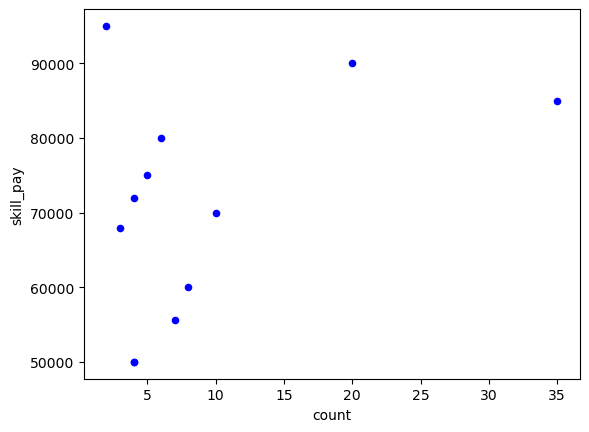

In [3]:
data ={
    'job_skills': ['sql', 'python','python','python', 'excel', 'power bi', 'tableau', 'r', 'sas', 'spark', 'hadoop', 'aws' ],
    'count': [10, 35, 8, 5, 7, 4, 3, 20, 2, 6,4,4],
    'skill_pay': [70000, 85000, 60000, 75000, 55555, 72000, 68000, 90000, 95000, 80000,50000,50000]
}
fd = pd.DataFrame(data)
fd.plot(kind='scatter', x='count', y='skill_pay', color='blue')

In [19]:
df_DS =df[df['job_title'].str.contains('data scientist', case=False, na=False)].copy()
df_DS


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
24,Data Scientist,Data Scientist (DataLab Team),Anywhere,via LinkedIn,Full-time,True,Serbia,2023-06-27 13:46:46,False,False,Serbia,None,NaN,NaN,Semrush,[python],{'programming': ['python']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."
785689,Data Scientist,Data Scientist -50065385,Israel,via LinkedIn,Full-time,False,Israel,2023-01-30 06:36:07,False,False,Israel,None,NaN,NaN,Phoenix Holdings קבוצת הפניקס,[sql],{'programming': ['sql']}
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785693,Senior Data Scientist,Senior Data Scientist BI,"Boulogne-Billancourt, France",via Emplois Trabajo.org,Full-time,False,France,2023-03-13 06:29:20,False,False,France,None,NaN,NaN,MWM,"[scikit-learn, pandas, numpy, keras, pytorch, ...","{'analyst_tools': ['visio'], 'libraries': ['sc..."


In [28]:
skill_stat = df_DS.explode('job_skills')
stat = skill_stat.groupby('job_skills').agg(
    pay=('salary_year_avg', 'median'), 
    skill_count=('job_skills', 'count'))
#filtering
stat_count = 20
stat = stat.sort_values(by='skill_count', ascending=False).head(stat_count)
stat

,pay,skill_count
job_skills,,
python,136990.00,117275
sql,140000.00,77469
r,130000.00,61052
sas,120000.00,29232
tableau,128816.00,28121
aws,137500.00,26997
spark,142500.00,25866
azure,132500.00,21633
tensorflow,149289.75,21598


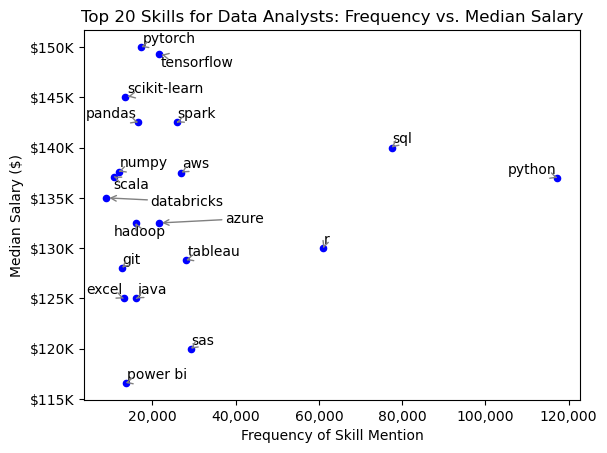

In [45]:
import matplotlib.ticker as mtick

stat.plot(kind='scatter', x='skill_count', y='pay', color='blue')

texts = []
for i, txt in enumerate(stat.index):
    texts.append(plt.text(stat['skill_count'].iloc[i], stat['pay'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=1))

ax = plt.gca()

# Format Y axis as $XXK
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# ✅ Format X axis with commas
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Top 20 Skills for Data Analysts: Frequency vs. Median Salary')
plt.xlabel('Frequency of Skill Mention')
plt.ylabel('Median Salary ($)')

plt.show()
